<a href="https://colab.research.google.com/github/GregoryG3/Thesis/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and loading Google drive

In [1]:
import pandas as pd
import numpy as np
from os.path import join
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PROJECT_DIR = "/content/drive/MyDrive/Thesis/Dataset"
PROCESSED_DIR = join(PROJECT_DIR, "processed")

# Load data

In [4]:
ratings = pd.read_csv(join(PROCESSED_DIR, "ratings.csv"), low_memory=False)
profiles = pd.read_csv(join(PROCESSED_DIR, "profiles_df.csv"), low_memory=False)

# Likert plot

In [ ]:
def likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix=""):
    for var in df.columns:
        if var in exclude:
            continue
        else:
            unique = df[var].unique()
            f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14,5))
            # From raw value to percentage
            totals = df[var].value_counts(dropna=False).sort_index()
            unsafe_bars = (df[df["rating"] == 0][var].value_counts(dropna=False)/totals * 100).sort_index()
            almost_unsafe_bars = (df[df["rating"] == 1][var].value_counts(dropna=False)/totals * 100).sort_index()
            almost_safe_bars = (df[df["rating"] == 2][var].value_counts(dropna=False)/totals * 100).sort_index()
            safe_bars = (df[df["rating"] == 3][var].value_counts(dropna=False)/totals * 100).sort_index()
            # plot
            barWidth = 0.99
            names = totals.index
            r = list(range(unique.shape[0]))
            # Create grey Bars
            buttom = totals/totals * 100
            ax1.barh(r, buttom, color='#33cc33', edgecolor='white', height=barWidth)
            # Create blue Bars
            buttom = buttom - safe_bars
            ax1.barh(r, buttom, color='#336600', edgecolor='white', height=barWidth)
            # Create orange Bars
            buttom = buttom - almost_safe_bars
            ax1.barh(r, buttom, color='#cc0000', edgecolor="white", height=barWidth)
            # Create green Bars
            buttom = buttom - almost_unsafe_bars
            ax1.barh(r, buttom, color='#ff3300', edgecolor='white', height=barWidth)
            # Custom x axis
            plt.yticks(r, unsafe_bars.index)

            ax2.barh(r, totals)
            # ax2.tick_params(
            #     axis='x',          # changes apply to the x-axis
            #     which='both',      # both major and minor ticks are affected
            #     bottom=False,      # ticks along the bottom edge are off
            #     top=False,         # ticks along the top edge are off
            #     labelbottom=False) # labels along the bottom edge are off
            plt.title(var)
            plt.tight_layout()
            #plt.savefig("plots/likert/" + filename_prefix + "_" + var + ".png")
            plt.show()

# Scene 01_SE_C_65
**Characterisitcs:**<br>
bicycleStreetType: green_surface <br>
FS type (Directions of travel): one-way street (Bicycle along one-way street)<br>
Special features: bicycle lane (Hollandaise)<br>
FS width (width of the road): narrow  3.50 m<br>
Parking: no <br>
Traffic volume: car-free<br>


Let's filter our data to scene SE_C_65

In [5]:
ratings_scene = ratings[['scene_id','sessionID','rating']][ratings['scene_id']=='01_SE_C_65']
df_scene = pd.merge(ratings_scene, profiles, on="sessionID")

In [6]:
informaiontion_value = []

for kolumna in df_scene.columns:
    wartosci = df_scene[kolumna].value_counts()
    suma_wystapien = wartosci.sum()
    informaiontion_value.append({
        'Nazwa kolumny': kolumna,
        'Wartosc': wartosci.index,
        'Liczba wystapien': wartosci.values,
        'Suma wystapien': suma_wystapien
    })

df_info = pd.DataFrame(informaiontion_value)
df_info

,Nazwa kolumny,Wartosc,Liczba wystapien,Suma wystapien
0,scene_id,"Index(['01_SE_C_65'], dtype='object', name='sc...",[474],474
1,sessionID,"Index(['25d366e0-05b4-444d-98e8-b2e0e4866389',...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",474
2,rating,"Index([3.0, 2.0, 1.0, 0.0], dtype='float64', n...","[394, 57, 19, 4]",474
3,Unnamed: 0,"Index([ 1, 7967, 8287, 8246, 8171, 814...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",474
4,gender,"Index(['m', 'w', 'd'], dtype='object', name='g...","[333, 132, 9]",474
...,...,...,...,...
92,introSelection_sharingConditions,"Index([1.0], dtype='float64', name='introSelec...",[64],64
93,introSelection_sharingModes,"Index([1.0], dtype='float64', name='introSelec...",[65],65
94,introSelection_offended,"Index([1.0], dtype='float64', name='introSelec...",[60],60
95,introSelection_annoyingTraffic,"Index([1.0], dtype='float64', name='introSelec...",[33],33


In [7]:
pd.set_option('display.max_columns', 95)
df_scene

,scene_id,sessionID,rating,Unnamed: 0,gender,zipcode,ageGroup,district,state,userGroup,bicycleUse,hasChildren,perspective,bikeReasonsVar,offended,annoyingTraffic,berlinTraffic_noise,berlinTraffic_rules,berlinTraffic_traffic,berlinTraffic_polution,berlinTraffic_aggression,berlinTraffic_maintenance,berlinTraffic_accidents,berlinTraffic_0,motivationalFactors_safe,motivationalFactors_faster,motivationalFactors_bikefun,motivationalFactors_weather,transportRatings_car,transportRatings_public,transportRatings_bicycle,transportRatings_motorbike,transportRatings_pedestrian,responsible_0,climateTraffic_0,climateTraffic_ice,climateTraffic_tolls,climateTraffic_public,climateTraffic_sharing,climateTraffic_bigCarTax,climateTraffic_cyclePaths,climateTraffic_tempolimit,climateTraffic_pedestrianSpace,climateTraffic_chargers,sharingConditions_0,sharingConditions_limits,sharingConditions_subsidy,...,sharingModes_0,sharingModes_car,sharingModes_bikes,sharingModes_bigscooter,sharingModes_transportbikes,sharingModes_ridesharing,sharingModes_vans,sharingModes_scooter,sharingModes_nada,saveSpace_0,saveSpace_carlanes,saveSpace_carparking,saveSpace_green,saveSpace_cyclewidth,saveSpace_pedestrianwidth,saveSpace_buslanes,saveSpace_nada,annoyingPeople_0,annoyingPeople_overtake,annoyingPeople_parkingViolations,annoyingPeople_phones,annoyingPeople_tailgate,annoyingPeople_speeding,annoyingPeople_rightOfWay,annoyingPeople_trafficLights,bikeReasons_infrastructure,bikeReasons_8,bikeReasons_distance,bikeReasons_children,bikeReasons_equipment,bikeReasons_skills,bikeReasons_physicalStrain,bikeReasons_social,vehiclesOwned_bicycle,vehiclesOwned_carsharing,vehiclesOwned_public,vehiclesOwned_car,vehiclesOwned_pedelec,vehiclesOwned_motorbike,introSelection_responsible,introSelection_climateTraffic,introSelection_annoyingPeople,introSelection_sharingConditions,introSelection_sharingModes,introSelection_offended,introSelection_annoyingTraffic,introSelection_saveSpace
0,01_SE_C_65,25d366e0-05b4-444d-98e8-b2e0e4866389,3.0,1,m,12055,4.0,Neukölln,Berlin,bicycle,1.0,False,C,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,True,NaN,3.0,4.0,4.0,0.0,2,3,5,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01_SE_C_65,511f28b9-6d78-4e8d-a9a7-63fce06cce66,3.0,5,m,13503,5.0,Reinickendorf,Berlin,bicycle,3.0,False,C,NaN,NaN,NaN,NaN,True,NaN,NaN,True,True,NaN,NaN,3.0,4.0,4.0,0.0,3,2,5,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01_SE_C_65,e3dde0bb-ebbf-49fe-be87-4e2e6bf044bb,3.0,16,m,10967,3.0,Neukölln,Berlin,bicycle,2.0,True,C,NaN,NaN,NaN,NaN,True,NaN,True,True,True,NaN,NaN,2.0,4.0,4.0,0.0,0,2,5,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01_SE_C_65,ee2ac657-9da8-4b7d-a84a-91213e182830,3.0,20,m,13357,4.0,Mitte,Berlin,pedestrian,NaN,False,P,Aggressivität im Straßenverkehr,NaN,NaN,NaN,True,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,1,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01_SE_C_65,63815a0c-c726-4726-b4f6-41cbb50043c1,3.0,27,w,10829,3.0,Tempelhof-Schöneberg,Berlin,bicycle,2.0,False,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,2.0,4.0,4.0,0.0,1,2,5,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [8]:
col_delete = ['scene_id', 'Unnamed: 0', 'bikeReasonsVar', 'offended', 'zipcode',
              'annoyingTraffic', 'offended', 'responsible_0',
              'climateTraffic_0', 'climateTraffic_ice', 'climateTraffic_tolls', 'climateTraffic_public',
              'climateTraffic_sharing', 'climateTraffic_bigCarTax', 'climateTraffic_cyclePaths',
              'climateTraffic_tempolimit', 'climateTraffic_pedestrianSpace', 'climateTraffic_chargers',
              'sharingConditions_0', 'sharingConditions_limits', 'sharingConditions_subsidy',
              'sharingConditions_sharingstations', 'sharingConditions_parking', 'sharingConditions_sidewalk',
              'sharingModes_0', 'sharingModes_car', 'sharingModes_bikes', 'sharingModes_bigscooter',
              'sharingModes_transportbikes', 'sharingModes_ridesharing', 'sharingModes_vans',
              'sharingModes_scooter', 'sharingModes_nada', 'saveSpace_0', 'saveSpace_carlanes',
              'saveSpace_carparking', 'saveSpace_green', 'saveSpace_cyclewidth',
              'saveSpace_pedestrianwidth', 'saveSpace_buslanes', 'saveSpace_nada',
              'annoyingPeople_0', 'annoyingPeople_overtake', 'annoyingPeople_parkingViolations',
              'annoyingPeople_phones', 'annoyingPeople_tailgate', 'annoyingPeople_speeding',
              'annoyingPeople_rightOfWay', 'annoyingPeople_trafficLights',
              'introSelection_climateTraffic', 'introSelection_annoyingPeople',
              'introSelection_sharingConditions', 'introSelection_sharingModes',
              'introSelection_offended', 'introSelection_annoyingTraffic',
              'introSelection_saveSpace', 'introSelection_responsible',
              'berlinTraffic_0', # have all NaN
              'bikeReasons_infrastructure', 'bikeReasons_8', 'bikeReasons_distance', # I will treat it like person without bike
              'bikeReasons_children', 'bikeReasons_equipment', 'bikeReasons_skills',
              'bikeReasons_physicalStrain', 'bikeReasons_social']

df_scene = df_scene.drop(columns=col_delete)

In [9]:
berlinTraffic_col = ['berlinTraffic_noise', 'berlinTraffic_rules', 'berlinTraffic_traffic',
                   'berlinTraffic_polution', 'berlinTraffic_aggression', 'berlinTraffic_maintenance',
                   'berlinTraffic_accidents']

df_scene['berlinTraffic_check'] = df_scene[berlinTraffic_col].notnull().any(axis=1).astype(int)

df_scene['berlinTraffic_check'].value_counts()

berlinTraffic_check
1    382
0     92
Name: count, dtype: int64

In [10]:
vehicle_col = ['vehiclesOwned_bicycle', 'vehiclesOwned_carsharing',
       'vehiclesOwned_public', 'vehiclesOwned_car', 'vehiclesOwned_pedelec',
       'vehiclesOwned_motorbike' ]

df_scene['vehicle_check'] = df_scene[vehicle_col].notnull().any(axis=1).astype(int)

df_scene['vehicle_check'].value_counts()

vehicle_check
1    472
0      2
Name: count, dtype: int64

In [11]:
motiv_col = ['motivationalFactors_safe', 'motivationalFactors_faster',
               'motivationalFactors_bikefun', 'motivationalFactors_weather']

df_scene['motivational_check'] = df_scene[motiv_col].notnull().any(axis=1).astype(int)

df_scene['motivational_check'].value_counts()
# here 0 is for respondents who don't use a bike so don't answer for this question

motivational_check
1    350
0    124
Name: count, dtype: int64

In [12]:
df_scene['state_new'] = df_scene['state'].apply(lambda x: 'Berlin' if x == 'Berlin' else 'Other' if pd.notna(x) else 0)
df_scene['state_new'].value_counts()

state_new
Berlin    421
Other      46
0           7
Name: count, dtype: int64

In [13]:
df_scene_filter = df_scene[(df_scene['vehicle_check']==1) &
                          (df_scene['berlinTraffic_check']==1) &
                          (df_scene['state_new'] !=0) ]

Let's fill in the NaN values ​​in the columns 'vehiclesOwned' and 'berlinTraffic' with 0 and False

In [14]:
df_scene_filter.loc[:, berlinTraffic_col] = df_scene_filter[berlinTraffic_col].fillna(False)
df_scene_filter.loc[:, vehicle_col] = df_scene_filter[vehicle_col].fillna(0)

Fill NaN values in BicycleUse and motivatonal questions to -1 : these are respondent who indicated that don't use the bike

In [15]:
df_scene_filter.loc[:, 'bicycleUse'] = df_scene_filter['bicycleUse'].fillna(-1)
df_scene_filter.loc[:, motiv_col] = df_scene_filter[motiv_col].fillna(-1)

Change value True to 1 and False to 0


In [16]:
df_scene_filter.loc[:, berlinTraffic_col] = df_scene_filter[berlinTraffic_col].replace({True: 1, False: 0})
df_scene_filter.loc[:, 'hasChildren'] = df_scene_filter['hasChildren'].astype(int)

Delete the coliumns which we use to verfication and 'distric', 'state'

In [17]:
df = df_scene_filter.drop(columns=['vehicle_check', 'berlinTraffic_check', 'motivational_check', 'district', 'state', 'perspective'])

In [18]:
pd.set_option('display.max_columns', 35)
df

,sessionID,rating,gender,ageGroup,userGroup,bicycleUse,hasChildren,berlinTraffic_noise,berlinTraffic_rules,berlinTraffic_traffic,berlinTraffic_polution,berlinTraffic_aggression,berlinTraffic_maintenance,berlinTraffic_accidents,motivationalFactors_safe,motivationalFactors_faster,motivationalFactors_bikefun,motivationalFactors_weather,transportRatings_car,transportRatings_public,transportRatings_bicycle,transportRatings_motorbike,transportRatings_pedestrian,vehiclesOwned_bicycle,vehiclesOwned_carsharing,vehiclesOwned_public,vehiclesOwned_car,vehiclesOwned_pedelec,vehiclesOwned_motorbike,state_new
0,25d366e0-05b4-444d-98e8-b2e0e4866389,3.0,m,4.0,bicycle,1.0,0,0,0,0,1,0,1,1,3.0,4.0,4.0,0.0,2,3,5,1,3,1.0,1.0,0.0,0.0,0.0,0.0,Berlin
1,511f28b9-6d78-4e8d-a9a7-63fce06cce66,3.0,m,5.0,bicycle,3.0,0,0,1,0,0,1,1,0,3.0,4.0,4.0,0.0,3,2,5,0,3,1.0,0.0,0.0,1.0,0.0,0.0,Berlin
2,e3dde0bb-ebbf-49fe-be87-4e2e6bf044bb,3.0,m,3.0,bicycle,2.0,1,0,1,0,1,1,1,0,2.0,4.0,4.0,0.0,0,2,5,0,3,1.0,0.0,0.0,0.0,1.0,0.0,Berlin
3,ee2ac657-9da8-4b7d-a84a-91213e182830,3.0,m,4.0,pedestrian,-1.0,0,0,1,0,1,1,0,0,-1.0,-1.0,-1.0,-1.0,0,4,1,0,5,0.0,0.0,1.0,0.0,0.0,0.0,Berlin
4,63815a0c-c726-4726-b4f6-41cbb50043c1,3.0,w,3.0,bicycle,2.0,0,0,0,0,0,1,1,1,2.0,4.0,4.0,0.0,1,2,5,1,3,1.0,1.0,0.0,0.0,0.0,0.0,Berlin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,18c3cd2b-fffc-4b2c-aead-47eec2b4d868,3.0,m,1.0,potentialBicycle,1.0,0,0,0,1,0,0,1,0,1.0,4.0,4.0,3.0,0,0,5,0,5,1.0,0.0,1.0,0.0,0.0,0.0,Berlin
379,2ae9da7f-7d9d-4d84-8b65-78b95ff50ec8,3.0,w,3.0,pedestrian,-1.0,0,0,0,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,0,5,2,0,5,1.0,0.0,1.0,0.0,0.0,0.0,Berlin
380,fc3a9c27-ce09-4638-86ce-a56eb7af6a6f,3.0,w,3.0,potentialBicycle,2.0,0,0,0,0,1,1,1,0,0.0,4.0,3.0,1.0,0,4,3,0,3,1.0,1.0,1.0,0.0,0.0,0.0,Berlin
381,25106dc4-255a-4470-8317-8dca821bcd54,2.0,m,3.0,potentialBicycle,1.0,0,0,1,0,0,1,1,0,4.0,3.0,4.0,1.0,3,5,5,0,3,1.0,1.0,1.0,0.0,0.0,0.0,Other


In [19]:
# df.to_csv('scene.csv', index=False)

## EDA

AGE

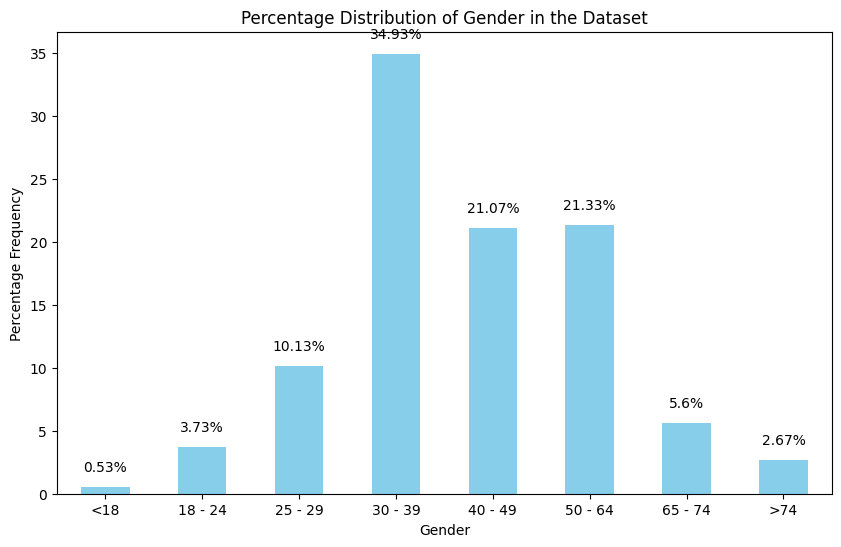

In [ ]:
current = df_scene_filter["ageGroup"]
current = (current.value_counts() / current.shape[0]).sort_index() * 100

plt.figure(figsize=(10, 6))
# change labels
age_label= {0: '<18',
            1: '18 - 24',
            2: '25 - 29',
            3: '30 - 39',
            4: '40 - 49',
            5: '50 - 64',
            6: '65 - 74',
            7: '>74'}
current.index = current.index.map(age_label)

# Generate the bar plot
current.plot(kind="bar", color="skyblue")

# Add title and axis labels
plt.title("Percentage Distribution of Gender in the Dataset")
plt.xlabel("Gender")
plt.ylabel("Percentage Frequency")
plt.xticks(rotation=0)

# Add labels to the bars
for i, v in enumerate(current):
    v_rounded = round(v, 2)
    plt.text(i, v + 1, str(v_rounded) + "%", ha='center', va='bottom')

plt.show()

GENDER

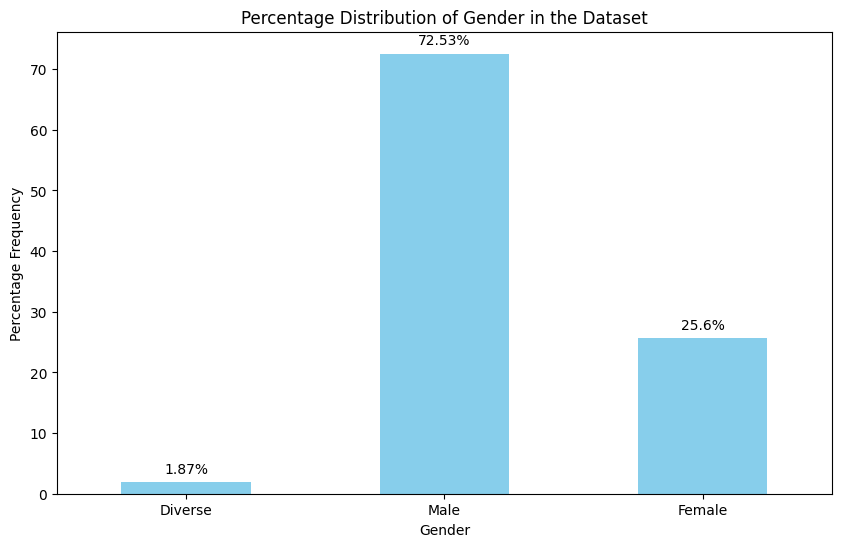

In [ ]:
current = df_scene_filter["gender"]
current = 100*(current.value_counts()/current.shape[0]).round(4).sort_index()

plt.figure(figsize=(10, 6))
# change labels
label_mapping = {'w': 'Female', 'm': 'Male', 'd': 'Diverse'}
current.index = current.index.map(label_mapping)

current.plot(kind="bar", color="skyblue")
# Add title and axis labels
plt.title("Percentage Distribution of Gender in the Dataset")
plt.xlabel("Gender")
plt.ylabel("Percentage Frequency")
plt.xticks(rotation=0)

# Add labels to the bars
for i, v in enumerate(current):
    plt.text(i, v + 1, str(v) + "%", ha='center', va='bottom')

plt.show()

Children

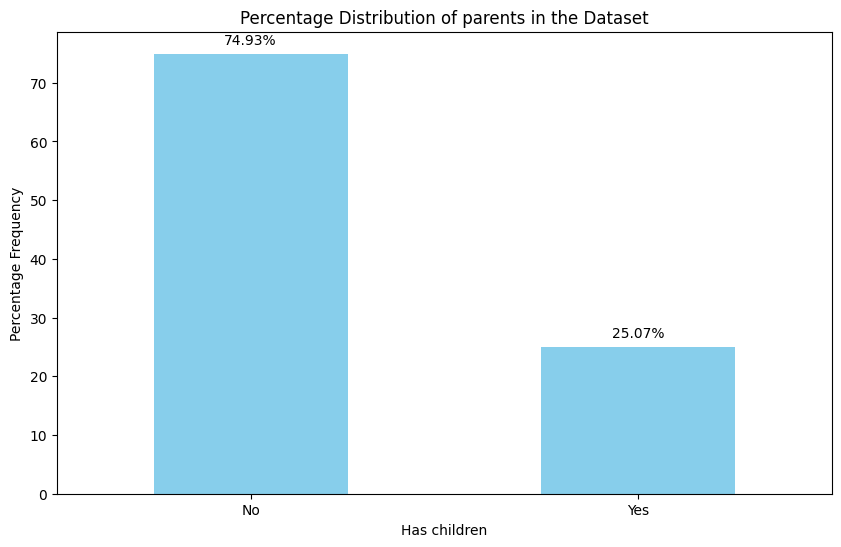

In [ ]:
current = df_scene_filter["hasChildren"]
current = 100*(current.value_counts()/current.shape[0]).sort_index()

# change labels
label_mapping = {0: 'No', 1: 'Yes'}
current.index = current.index.map(label_mapping)


plt.figure(figsize=(10, 6))
current.plot(kind="bar", color="skyblue")
# Add title and axis labels
plt.title("Percentage Distribution of parents in the Dataset")
plt.xlabel("Has children")
plt.ylabel("Percentage Frequency")
plt.xticks(rotation=0)

# Add labels to the bars
for i, v in enumerate(current):
    v_rounded = round(v, 2)
    plt.text(i, v + 1, str(v_rounded) + "%", ha='center', va='bottom')

plt.show()

Transport available for respondent:

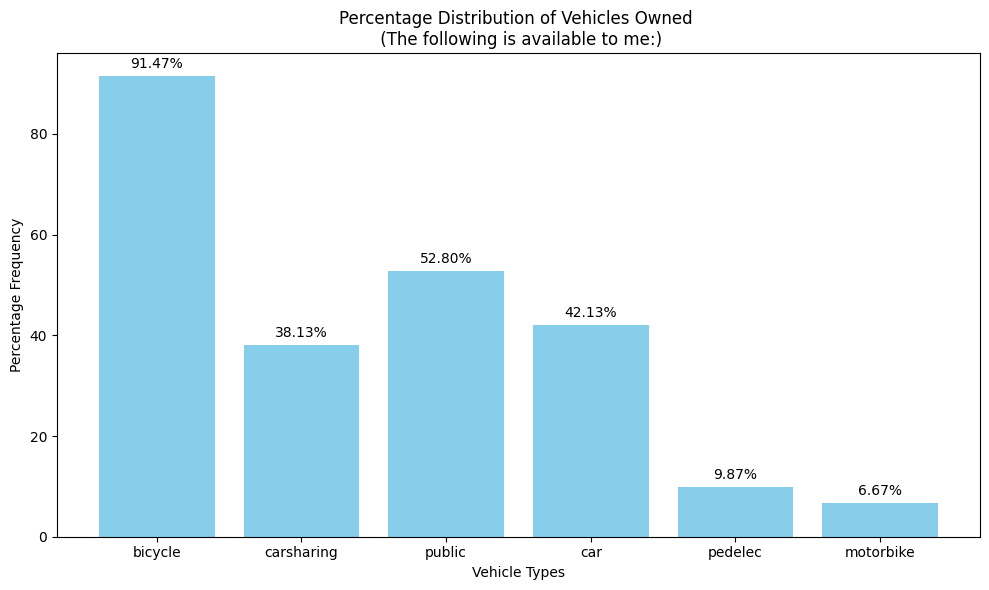

In [ ]:
ve = "vehiclesOwned"
cols = []
vals = []
for col in df_scene_filter.columns:
    if ve in col:
        cols.append(col.split("_")[-1])
        val = 100 * (df_scene_filter[col].sum() / df_scene_filter[col].shape[0])
        vals.append(val)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(vals)), vals, color='skyblue')
plt.xticks(range(len(vals)), cols, rotation=0)
plt.xlabel('Vehicle Types')
plt.ylabel('Percentage Frequency')
plt.title('Percentage Distribution of Vehicles Owned \n (The following is available to me:)')

# Add labels to the bars
for bar, val in zip(bars, vals):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{val:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

New State


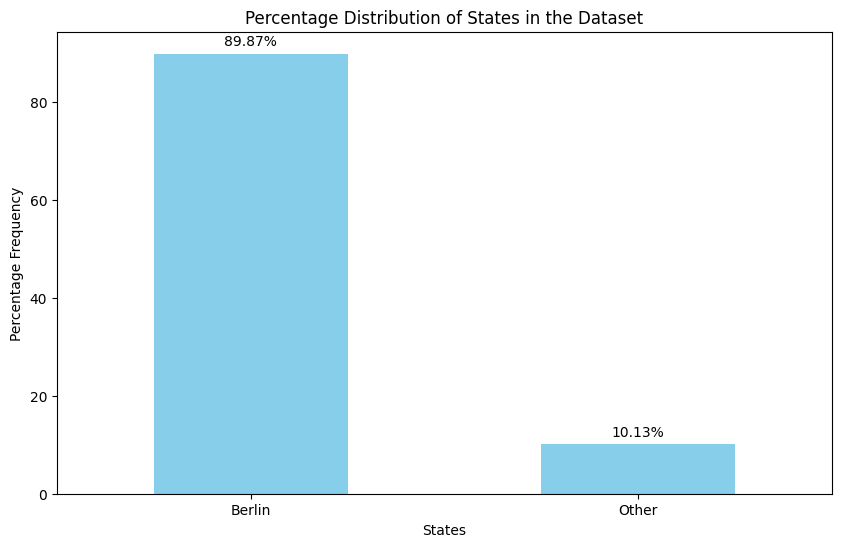

In [ ]:
current = df_scene_filter["state_new"]
current_percentage = 100 * (current.value_counts() / current.shape[0]).round(4).sort_index()

plt.figure(figsize=(10, 6))

# Generate the bar plot
current_percentage.plot(kind="bar", color="skyblue")
# Add title and axis labels
plt.title("Percentage Distribution of States in the Dataset")
plt.xlabel("States")
plt.ylabel("Percentage Frequency")
# Rotate x-axis labels
plt.xticks(rotation=0)

# Add labels to the bars
for i, v in enumerate(current_percentage):
    plt.text(i, v + 1, str(v) + "%", ha='center', va='bottom')

plt.show()

Bike Use

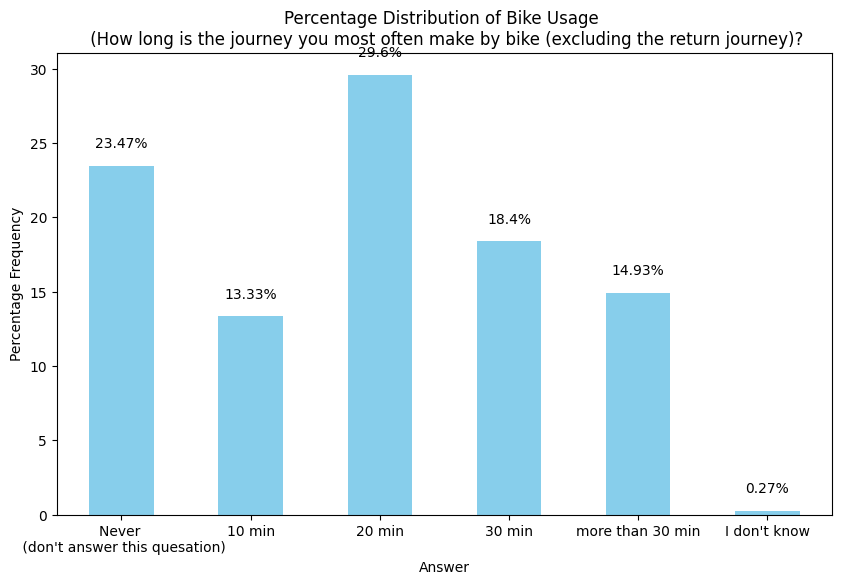

In [ ]:
current = df_scene_filter["bicycleUse"]
current = (current.value_counts() / current.shape[0]).sort_index() * 100

plt.figure(figsize=(10, 6))
# change labels
bike_label= {-1: "Never \n (don't answer this quesation)",
            0: '10 min',
            1: '20 min',
            2: '30 min',
            3: 'more than 30 min',
            4: "I don't know"}
current.index = current.index.map(bike_label)

# Generate the bar plot
current.plot(kind="bar", color="skyblue")

# Add title and axis labels
plt.title("Percentage Distribution of Bike Usage \n (How long is the journey you most often make by bike (excluding the return journey)?")
plt.xlabel("Answer")
plt.ylabel("Percentage Frequency")
plt.xticks(rotation=0)

# Add labels to the bars
for i, v in enumerate(current):
    v_rounded = round(v, 2)
    plt.text(i, v + 1, str(v_rounded) + "%", ha='center', va='bottom')

plt.show()

Tranpsort Rating

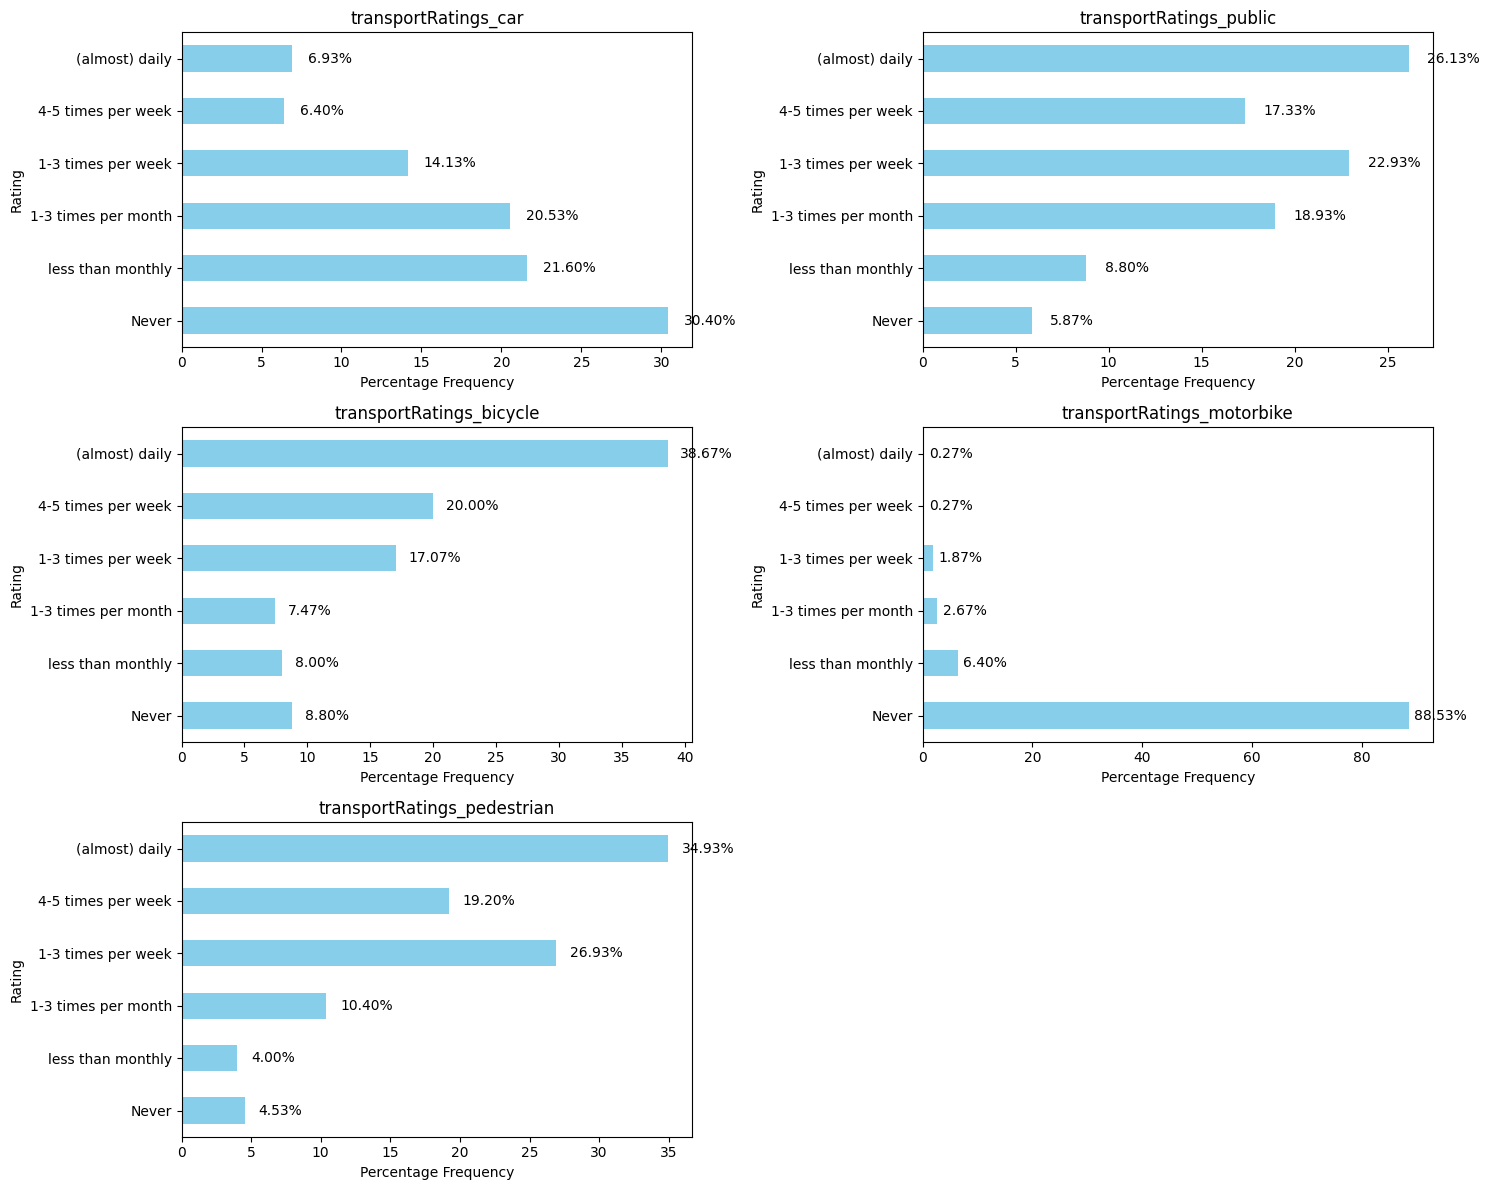

In [ ]:
tr = "transportRatings"
num_plots = sum([1 for col in df_scene_filter.columns if tr in col])  # Liczba kolumn zaczynających się od "transportRatings"

num_rows = 3
num_cols = 2

labels= {0: 'Never',
        1: 'less than monthly',
        2: '1-3 times per month',
        3: '1-3 times per week',
        4: '4-5 times per week',
        5: '(almost) daily'}


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

subplot_index = 0  # Indeks subfigure

for col in df_scene_filter.columns:
    if tr in col:
        current_ax = axes[subplot_index // num_cols, subplot_index % num_cols]
        current_ax.set_title(col)
        current = df_scene_filter[col]
        current = 100 * (current.value_counts() / current.shape[0]).sort_index()
        current.plot(kind="barh", color="skyblue", ax=current_ax)  # Zmiana orientacji na poziomą

        current_ax.set_ylabel('Rating')
        current_ax.set_xlabel('Percentage Frequency')

        # Dodawanie etykiet do słupków
        for i, v in enumerate(current):
            current_ax.text(v + 1, i, f"{v:.2f}%", ha='left', va='center')

        # Dodawanie etykiet na osi Y
        current_ax.set_yticklabels([labels[int(label.get_text())] for label in current_ax.get_yticklabels()])

        subplot_index += 1  # Zwiększenie indeksu subfigure

# Ukrywanie pustego subplotu
if subplot_index < num_rows * num_cols:
    for ax in axes.flatten()[subplot_index:]:
        ax.axis('off')

plt.tight_layout()
plt.show()

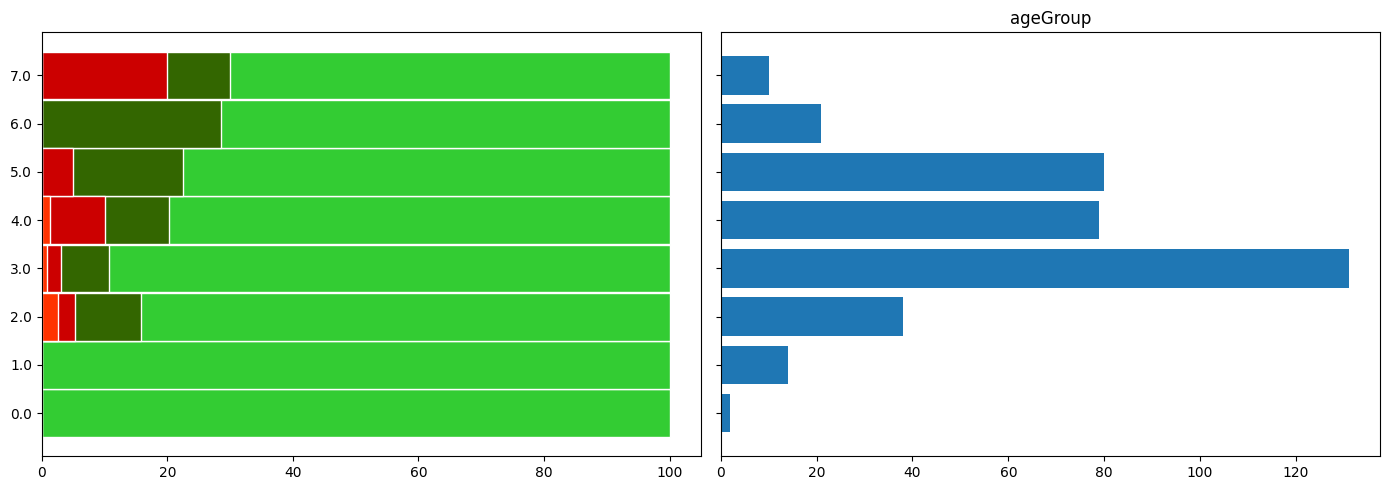

In [ ]:
width_features = ['ageGroup']
likert_plot(df_scene_filter[[*width_features, "rating"]])


## Mixed Model

Modele wielopoziomowe (mixed models) to doskonały wybór do analizowania danych, które mają naturalną strukturę hierarchiczną lub grupowania. Pozwalają one na modelowanie zmiennych zależnych z uwzględnieniem różnych poziomów zagnieżdżenia w danych, co może być przydatne w przypadku, gdy odpowiedzi respondentów są zróżnicowane w zależności od innych czynników grupowych (na przykład lokalizacji, typu użycia roweru, grup wiekowych itp.)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df_scene_filter.columns

Index(['sessionID', 'rating', 'gender', 'ageGroup', 'district', 'state',
       'userGroup', 'bicycleUse', 'hasChildren', 'perspective',
       'berlinTraffic_noise', 'berlinTraffic_rules', 'berlinTraffic_traffic',
       'berlinTraffic_polution', 'berlinTraffic_aggression',
       'berlinTraffic_maintenance', 'berlinTraffic_accidents',
       'motivationalFactors_safe', 'motivationalFactors_faster',
       'motivationalFactors_bikefun', 'motivationalFactors_weather',
       'transportRatings_car', 'transportRatings_public',
       'transportRatings_bicycle', 'transportRatings_motorbike',
       'transportRatings_pedestrian', 'vehiclesOwned_bicycle',
       'vehiclesOwned_carsharing', 'vehiclesOwned_public', 'vehiclesOwned_car',
       'vehiclesOwned_pedelec', 'vehiclesOwned_motorbike', 'state_new'],
      dtype='object')

In [ ]:
data = df_scene_filter[['sessionID','rating','gender', 'ageGroup','state_new', 'bicycleUse','hasChildren']]

In [ ]:
data

,sessionID,rating,gender,ageGroup,state_new,bicycleUse
0,25d366e0-05b4-444d-98e8-b2e0e4866389,3.0,m,4.0,Berlin,1.0
1,511f28b9-6d78-4e8d-a9a7-63fce06cce66,3.0,m,5.0,Berlin,3.0
2,e3dde0bb-ebbf-49fe-be87-4e2e6bf044bb,3.0,m,3.0,Berlin,2.0
3,ee2ac657-9da8-4b7d-a84a-91213e182830,3.0,m,4.0,Berlin,-1.0
4,63815a0c-c726-4726-b4f6-41cbb50043c1,3.0,w,3.0,Berlin,2.0
...,...,...,...,...,...,...
378,18c3cd2b-fffc-4b2c-aead-47eec2b4d868,3.0,m,1.0,Berlin,1.0
379,2ae9da7f-7d9d-4d84-8b65-78b95ff50ec8,3.0,w,3.0,Berlin,-1.0
380,fc3a9c27-ce09-4638-86ce-a56eb7af6a6f,3.0,w,3.0,Berlin,2.0
381,25106dc4-255a-4470-8317-8dca821bcd54,2.0,m,3.0,Other,1.0


In [ ]:
# Przekształcenie zmiennych kategorycznych na zmienne dummy
df = pd.get_dummies(data, columns=['gender', 'state_new'])

In [ ]:
df.columns

Index(['sessionID', 'rating', 'ageGroup', 'bicycleUse', 'gender_d', 'gender_m',
       'gender_w', 'state_new_Berlin', 'state_new_Other'],
      dtype='object')

In [ ]:
correlation_matrix = df.drop('sessionID', axis=1).corr()
print(correlation_matrix)


                    rating  ageGroup  bicycleUse  gender_d  gender_m  \
rating            1.000000 -0.128591    0.025619 -0.084011  0.099771   
ageGroup         -0.128591  1.000000    0.101489 -0.089325  0.050046   
bicycleUse        0.025619  0.101489    1.000000 -0.003116  0.045780   
gender_d         -0.084011 -0.089325   -0.003116  1.000000 -0.224125   
gender_m          0.099771  0.050046    0.045780 -0.224125  1.000000   
gender_w         -0.075986 -0.023482   -0.045855 -0.080902 -0.953234   
state_new_Berlin -0.058449  0.009021   -0.021070 -0.018978 -0.048254   
state_new_Other   0.058449 -0.009021    0.021070  0.018978  0.048254   

                  gender_w  state_new_Berlin  state_new_Other  
rating           -0.075986         -0.058449         0.058449  
ageGroup         -0.023482          0.009021        -0.009021  
bicycleUse       -0.045855         -0.021070         0.021070  
gender_d         -0.080902         -0.018978         0.018978  
gender_m         -0.953234     

In [ ]:
# Dopasowanie generalizowanego modelu mieszanych
model = smf.mixedlm("rating ~ gender_m + gender_w + ageGroup  + bicycleUse + state_new_Berlin", df, groups=df["sessionID"])
result = model.fit()

# Wyświetlenie wyników
print(result.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     rating   
No. Observations:     375         Method:                 REML     
No. Groups:           375         Scale:                  0.1543   
Min. group size:      1           Log-Likelihood:         -320.9528
Max. group size:      1           Converged:              Yes      
Mean group size:      1.0                                          
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 2.674    0.102 26.258 0.000  2.475  2.874
gender_m[T.True]          0.433    0.148  2.925 0.003  0.143  0.724
gender_w[T.True]          0.326    0.157  2.083 0.037  0.019  0.633
state_new_Berlin[T.True] -0.100    0.086 -1.168 0.243 -0.268  0.068
ageGroup                 -0.060    0.020 -2.997 0.003 -0.100 -0

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


### podejscie nr 2

In [32]:
# Konwersja zmiennych na typ kategoryczny
categorical_vars = ['ageGroup', 'userGroup','bicycleUse', 'transportRatings_car', 'transportRatings_public',
                    'transportRatings_bicycle', 'transportRatings_motorbike', 'transportRatings_pedestrian',
                    'vehiclesOwned_bicycle', 'vehiclesOwned_carsharing', 'vehiclesOwned_public',
                    'vehiclesOwned_car', 'vehiclesOwned_pedelec', 'vehiclesOwned_motorbike', 'state_new',
                    'motivationalFactors_safe', 'motivationalFactors_faster', 'motivationalFactors_bikefun',
                    'motivationalFactors_weather']
data_updated = df

for var in categorical_vars:
    data_updated[var] = data_updated[var].astype('category')

In [38]:
data_updated['userGroup'].value_counts()

userGroup
potentialBicycle    204
bicycle              83
pedestrian           73
car                  15
Name: count, dtype: int64

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Budowanie modelu z użyciem zaktualizowanych zmiennych kategorycznych
formula = "rating ~ C(gender) + C(userGroup) + C(bicycleUse) + hasChildren + C(transportRatings_car) + C(transportRatings_public) + C(transportRatings_bicycle) + \
           C(transportRatings_motorbike) + C(transportRatings_pedestrian) + C(vehiclesOwned_bicycle) + C(vehiclesOwned_carsharing) + \
           C(vehiclesOwned_public) + C(vehiclesOwned_car) + C(vehiclesOwned_pedelec) + C(vehiclesOwned_motorbike) + C(motivationalFactors_safe) + \
           C(motivationalFactors_faster) + C(motivationalFactors_bikefun) + C(motivationalFactors_weather) + C(state_new)"

md_corrected = smf.mixedlm(formula, data=data_updated, groups=data_updated["ageGroup"])
mdf_corrected = md_corrected.fit(method='nm')  # Metoda Nelder-Mead dla optymalizacji

mdf_corrected.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2704: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Mixed Linear Model Regression Results
===============================================================================================
Model:                          MixedLM              Dependent Variable:              rating   
No. Observations:               375                  Method:                          REML     
No. Groups:                     8                    Scale:                           0.2821   
Min. group size:                2                    Log-Likelihood:                  -295.1527
Max. group size:                131                  Converged:                       Yes      
Mean group size:                46.9                                                           
-----------------------------------------------------------------------------------------------
                                       Coef.    Std.Err.    z    P>|z|    [0.025       0.975]  
-----------------------------------------------------------------------------------------------
Intercept                             -15.102 3529102.004 -0.000 1.000 -6916927.927 6916897.723
C(gender)[T.m]                          0.273       0.239  1.141 0.254       -0.196       0.742
C(gender)[T.w]                          0.143       0.248  0.577 0.564       -0.343       0.628
C(userGroup)[T.car]                    17.889 1104018.142  0.000 1.000 -2163817.908 2163853.685
C(userGroup)[T.pedestrian]             17.715 2174596.143  0.000 1.000 -4262112.407 4262147.837
C(userGroup)[T.potentialBicycle]        0.153       0.121  1.270 0.204       -0.083       0.389
C(bicycleUse)[T.0.0]                   31.588                                                  
C(bicycleUse)[T.1.0]                   31.432                                                  
C(bicycleUse)[T.2.0]                   31.417                                                  
C(bicycleUse)[T.3.0]                   31.465                                                  
C(bicycleUse)[T.4.0]                   16.680 3612538.190  0.000 1.000 -7080428.064 7080461.425
hasChildren[T.1]                        0.070       0.083  0.847 0.397       -0.092       0.232
C(transportRatings_car)[T.1]           -0.062       0.092 -0.681 0.496       -0.242       0.117
C(transportRatings_car)[T.2]            0.001       0.100  0.015 0.988       -0.194       0.197
C(transportRatings_car)[T.3]           -0.011       0.120 -0.094 0.925       -0.247       0.224
C(transportRatings_car)[T.4]           -0.334       0.160 -2.088 0.037       -0.648      -0.020
C(transportRatings_car)[T.5]           -0.036       0.186 -0.196 0.845       -0.402       0.329
C(transportRatings_public)[T.1]         0.022       0.173  0.125 0.900       -0.318       0.361
C(transportRatings_public)[T.2]         0.048       0.153  0.315 0.752       -0.252       0.349
C(transportRatings_public)[T.3]         0.007       0.157  0.046 0.963       -0.300       0.314
C(transportRatings_public)[T.4]         0.068       0.172  0.396 0.692       -0.269       0.406
C(transportRatings_public)[T.5]         0.239       0.173  1.383 0.167       -0.100       0.578
C(transportRatings_bicycle)[T.1]        0.145       0.155  0.932 0.351       -0.159       0.449
C(transportRatings_bicycle)[T.2]       -0.001       0.169 -0.005 0.996       -0.333       0.331
C(transportRatings_bicycle)[T.3]        2.331       0.654  3.565 0.000        1.050       3.613
C(transportRatings_bicycle)[T.4]        2.434       0.655  3.714 0.000        1.150       3.718
C(transportRatings_bicycle)[T.5]        2.437       0.657  3.710 0.000        1.150       3.725
C(transportRatings_motorbike)[T.1]     -0.114       0.154 -0.738 0.460       -0.415       0.188
C(transportRatings_motorbike)[T.2]     -0.104       0.212 -0.492 0.623       -0.520       0.311
C(transportRatings_motorbike)[T.3]      0.262       0.232  1.132 0.258       -0.192       0.717
C(transportRatings_motorbike)[T.4]      0.16

Intercept: Bardzo duże wartości współczynnika i błędu standardowego dla przecięcia sugerują problem z konwergencją lub specyfikacją modelu, który może wynikać z rzadkości niektórych kategorii lub zbyt małej liczby obserwacji w niektórych grupach.

Gender: Brak istotnych różnic między płciami w percepcji bezpieczeństwa.

UserGroup: Wysokie współczynniki dla grup użytkowników 'car' i 'pedestrian' są nieistotne z powodu bardzo dużych błędów standardowych, co może wskazywać na problemy z multicollinearity lub zbyt małą próbę dla tych kategorii.

Bicycle Use: Ciekawe są bardzo wysokie współczynniki dla różnych poziomów korzystania z roweru, które jednak nie mają zauważalnego wpływu statystycznego, z wyjątkiem grupy, która korzysta z roweru "więcej niż 30 min". To może wskazywać na silniejsze postrzeganie bezpieczeństwa wśród regularnych użytkowników rowerów.

Has Children: Brak istotnych wpływów na percepcję bezpieczeństwa.

Transport Ratings: Znaczący wpływ na percepcję bezpieczeństwa ma tylko ocena korzystania z roweru dla najwyższych kategorii, sugerując, że regularne korzystanie z roweru pozytywnie wpływa na postrzegane bezpieczeństwo.

Vehicle Ownership: Generalnie, posiadanie pojazdów nie ma znaczącego wpływu na postrzeganie bezpieczeństwa.

Motivational Factors: Czynniki motywacyjne związane z zabawą (bikefun) pokazały znaczący negatywny wpływ na ocenę bezpieczeństwa dla najniższych kategorii, co może sugerować, że osoby mniej zmotywowane do jazdy dla zabawy mogą czuć się mniej bezpiecznie.

State: Brak znaczących różnic między Berlinem a innymi lokalizacjami.

Jak zmienić kategorię referencyjną:

W Pythonie, używając patsy w modelowaniu statystycznym lub pandas przy przygotowaniu danych, możesz określić, która kategoria ma być bazowa. Oto przykład zmiany kategorii referencyjnej dla state_new w Pandas:

In [ ]:
# To pozwoli na użycie "Other" jako kategorii referencyjnej,
# a "Berlin" będzie teraz kategorią, dla której model pokaże wyniki.

# data['state_new'] = data['state_new'].astype('category')
# data['state_new'].cat.reorder_categories(['Other', 'Berlin'], ordered=True, inplace=True)

#### what kind of individual factors responsible for difference perspective in safety?

Oto analiza tych czynników, które mogą być odpowiedzialne za te różnice:

  Częstość korzystania z roweru (Bicycle Use):<br>
      Osoby korzystające z roweru przez "więcej niż 30 min" wykazywały wyższą ocenę bezpieczeństwa. To sugeruje, że regularni użytkownicy rowerów mogą czuć się bardziej komfortowo i bezpiecznie na drogach, prawdopodobnie dzięki większemu doświadczeniu lub lepszemu dostosowaniu do warunków ruchu drogowego.

  Korzystanie z roweru (Transport Ratings for Bicycle):<br>
      Wysokie oceny korzystania z roweru (kategorie 3, 4, i 5, które odpowiadają częstszemu używaniu rowerów) były powiązane ze znacznie wyższymi ocenami bezpieczeństwa. To może oznaczać, że osoby, które czują się bezpieczniej, są bardziej skłonne do częstszego korzystania z roweru.

  Motywacyjne czynniki związane z zabawą (Motivational Factors for Bikefun):<br>
      Osoby, które oceniły niższe wartości dla zabawy z jazdy na rowerze, miały tendencję do niższych ocen bezpieczeństwa. Może to wskazywać na to, że postrzeganie bezpieczeństwa jest silniej związane z pozytywnymi emocjami związanymi z jazdą na rowerze.

## Segmentacja K-means

In [133]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

import seaborn as sns


data = df

In [134]:
categorical_cols = ['gender', 'userGroup', 'hasChildren', 'state_new', 'ageGroup',
                    'bicycleUse', 'berlinTraffic_noise', 'berlinTraffic_rules',
                    'berlinTraffic_traffic', 'berlinTraffic_polution', 'berlinTraffic_aggression',
                    'berlinTraffic_maintenance', 'berlinTraffic_accidents',
                    # 'transportRatings_car', 'transportRatings_public',
                    # 'transportRatings_bicycle', 'transportRatings_motorbike',
                    # 'transportRatings_pedestrian',
                    # 'vehiclesOwned_bicycle', 'vehiclesOwned_carsharing',
                    # 'vehiclesOwned_public', 'vehiclesOwned_car',
                    # 'vehiclesOwned_pedelec', 'vehiclesOwned_motorbike',
                    'motivationalFactors_safe', 'motivationalFactors_faster',
                    'motivationalFactors_bikefun', 'motivationalFactors_weather',]

numerical_cols = ['rating']  # We treat 'rating' as numerical to simplify the analyses

In [135]:
# 'sessionID' isn't necessary to analysis
data = data.drop(columns='sessionID')

In [136]:
#  Convert the numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

### determin number of cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


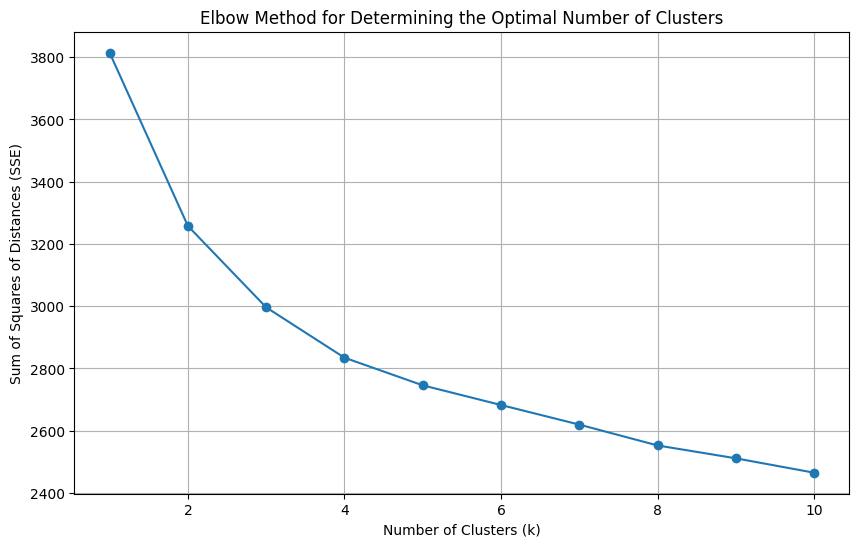

In [137]:
# Apply the transformation
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
data_preprocessed = pipeline.fit_transform(data)

# Apply the elbow method to determine the optimal number of clusters
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_preprocessed)
    sse[k] = kmeans.inertia_

# Plot the results of the elbow method
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method for Determining the Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squares of Distances (SSE)')
plt.grid(True)
plt.show()

Based on the graph, the SSE decline becomes less steep between clusters 3 and 4. The choice of 3 clusters may be justified due to the more simplified segmentation with fewer clusters that still provides sufficient difference between segments. This is especially valuable if the clusters are well defined and easy to interpret in the context of the study.

In [138]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_preprocessed)
data['Cluster'] = kmeans.labels_

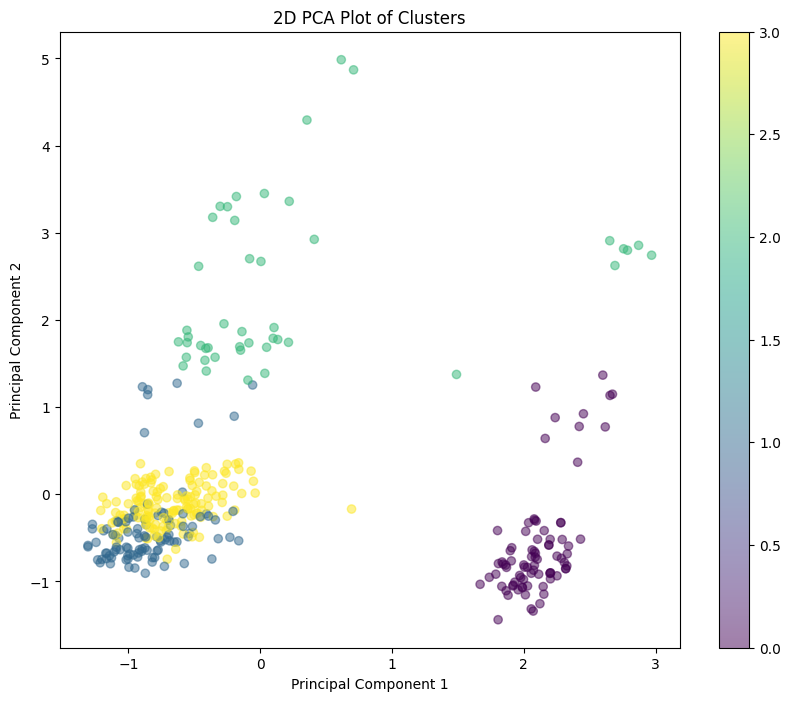

In [144]:
# Visualization - example using PCA to reduce dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_preprocessed.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=data['Cluster'], alpha=0.5, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Plot of Clusters')
plt.colorbar()
plt.show()


### Clusters information

In [143]:
# Przygotowanie statystyk opisowych
stats_df = data.groupby('Cluster')[numerical_cols[0]].agg(['mean', 'std', 'median', 'min', 'max']).reset_index()
stats_df.columns = ['Cluster', 'Mean', 'Standard Deviation', 'Median', 'Minimum', 'Maximum']

# Wyświetlenie tabeli
print("Statistical summary for each cluster:")
display(stats_df)

Statistical summary for each cluster:


,Cluster,Mean,Standard Deviation,Median,Minimum,Maximum
0,0,2.878049,0.329243,3.0,2.0,3.0
1,1,2.920000,0.272660,3.0,2.0,3.0
2,2,1.488889,0.626034,2.0,0.0,2.0
3,3,3.000000,0.000000,3.0,3.0,3.0


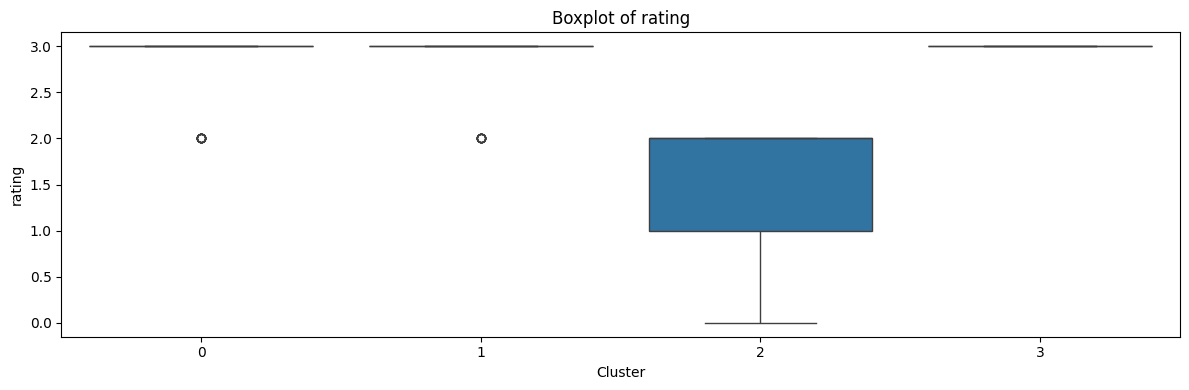

In [139]:
# Wykresy pudełkowe dla zmiennych numerycznych
plt.figure(figsize=(12, len(numerical_cols) * 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 1, i + 1)
    sns.boxplot(x='Cluster', y=col, data=data)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

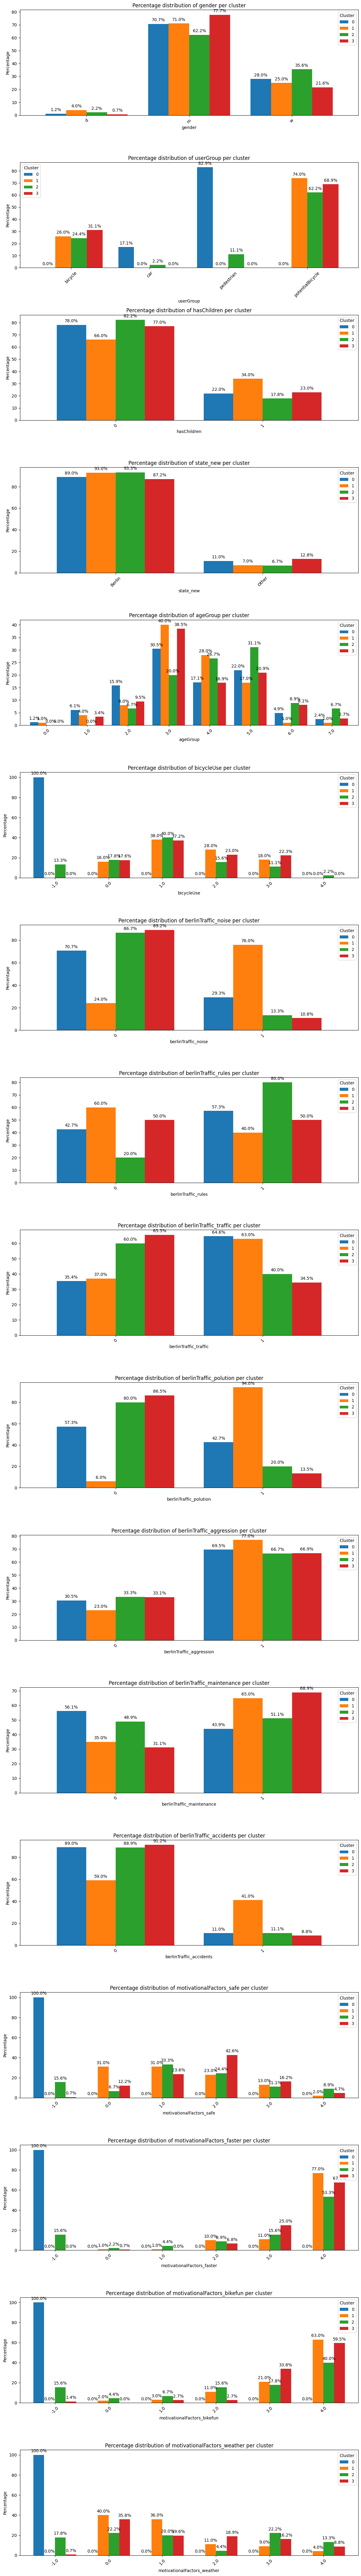

In [140]:
# Wykresy słupkowe dla zmiennych kategorycznych z kolumnami obok siebie
plt.figure(figsize=(12, len(categorical_cols) * 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i + 1)
    # Tworzenie tabeli przestawnej dla łatwiejszej wizualizacji
    category_counts = data.pivot_table(index=col, columns='Cluster', aggfunc='size', fill_value=0)
    category_percent = category_counts.div(category_counts.sum()).multiply(100)  # Zamiana na procenty
    bars = category_percent.plot(kind='bar', ax=plt.gca(), width=0.8)  # width dostosowuje szerokość słupków

    # Dodanie etykiet procentowych na słupki
    for p in bars.patches:
        bars.annotate(format(p.get_height(), '.1f') + '%',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')

    plt.title(f'Percentage distribution of {col} per cluster')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)  # Obrót etykiet dla lepszej czytelności
plt.tight_layout()
plt.show()

In [141]:
# Tabela porównawcza dla zmiennych kategorycznych
comparison_table = pd.DataFrame()
for col in categorical_cols:
    for cluster in data['Cluster'].unique():
        cluster_data = data[data['Cluster'] == cluster]
        mode_value = cluster_data[col].mode()[0]
        mode_percentage = (cluster_data[col] == mode_value).mean() * 100
        comparison_table.loc[cluster, f'{col} mode'] = mode_value
        comparison_table.loc[cluster, f'{col} mode %'] = mode_percentage

print("Comparative table of categorical variables across clusters:")
display(comparison_table)

Comparative table of categorical variables across clusters:


,gender mode,gender mode %,userGroup mode,userGroup mode %,hasChildren mode,hasChildren mode %,state_new mode,state_new mode %,ageGroup mode,ageGroup mode %,bicycleUse mode,bicycleUse mode %,berlinTraffic_noise mode,berlinTraffic_noise mode %,berlinTraffic_rules mode,berlinTraffic_rules mode %,berlinTraffic_traffic mode,berlinTraffic_traffic mode %,berlinTraffic_polution mode,berlinTraffic_polution mode %,berlinTraffic_aggression mode,berlinTraffic_aggression mode %,berlinTraffic_maintenance mode,berlinTraffic_maintenance mode %,berlinTraffic_accidents mode,berlinTraffic_accidents mode %,motivationalFactors_safe mode,motivationalFactors_safe mode %,motivationalFactors_faster mode,motivationalFactors_faster mode %,motivationalFactors_bikefun mode,motivationalFactors_bikefun mode %,motivationalFactors_weather mode,motivationalFactors_weather mode %
1,m,71.000000,potentialBicycle,74.000000,0.0,66.000000,Berlin,93.000000,3.0,40.000000,1.0,38.000000,1.0,76.000000,0.0,60.000000,1.0,63.000000,1.0,94.000000,1.0,77.000000,1.0,65.000000,0.0,59.000000,0.0,31.000000,4.0,77.000000,4.0,63.000000,0.0,40.000000
3,m,77.702703,potentialBicycle,68.918919,0.0,77.027027,Berlin,87.162162,3.0,38.513514,1.0,37.162162,0.0,89.189189,0.0,50.000000,0.0,65.540541,0.0,86.486486,1.0,66.891892,1.0,68.918919,0.0,91.216216,2.0,42.567568,4.0,67.567568,4.0,59.459459,0.0,35.810811
0,m,70.731707,pedestrian,82.926829,0.0,78.048780,Berlin,89.024390,3.0,30.487805,-1.0,100.000000,0.0,70.731707,1.0,57.317073,1.0,64.634146,0.0,57.317073,1.0,69.512195,0.0,56.097561,0.0,89.024390,-1.0,100.000000,-1.0,100.000000,-1.0,100.000000,-1.0,100.000000
2,m,62.222222,potentialBicycle,62.222222,0.0,82.222222,Berlin,93.333333,5.0,31.111111,1.0,40.000000,0.0,86.666667,1.0,80.000000,0.0,60.000000,0.0,80.000000,1.0,66.666667,1.0,51.111111,0.0,88.888889,1.0,33.333333,4.0,53.333333,4.0,40.000000,0.0,22.222222


## Kruskal-Wallis Test
Jest to nieparametryczny odpowiednik jednoczynnikowej ANOVY, który można użyć do porównania median pomiędzy trzema lub więcej niezależnymi grupami.

In [20]:
from scipy.stats import kruskal

# Przygotowanie danych do testów Kruskal-Wallisa
# Usuwamy brakujące wartości
data_kruskal = df[['rating', 'gender', 'bicycleUse', 'hasChildren']].dropna()

# Przeprowadzenie testu Kruskal-Wallisa dla płci
gender_groups = [group['rating'].values for name, group in data_kruskal.groupby('gender')]
kruskal_gender = kruskal(*gender_groups)

# Przeprowadzenie testu Kruskal-Wallisa dla częstości używania roweru
bicycle_groups = [group['rating'].values for name, group in data_kruskal.groupby('bicycleUse')]
kruskal_bicycle = kruskal(*bicycle_groups)

# Przeprowadzenie testu Kruskal-Wallisa dla posiadania dzieci
children_groups = [group['rating'].values for name, group in data_kruskal.groupby('hasChildren')]
kruskal_children = kruskal(*children_groups)

kruskal_gender, kruskal_bicycle, kruskal_children

(KruskalResult(statistic=3.5588532929901975, pvalue=0.16873486426525702),
 KruskalResult(statistic=6.022198622888684, pvalue=0.3040648858821468),
 KruskalResult(statistic=2.8943963901222904, pvalue=0.0888880635072254))

In [22]:
additional_variables = [
    'userGroup', 'state_new', 'motivationalFactors_safe', 'motivationalFactors_faster',
    'motivationalFactors_bikefun', 'motivationalFactors_weather', 'berlinTraffic_traffic',
    'berlinTraffic_polution', 'berlinTraffic_aggression', 'berlinTraffic_maintenance', 'berlinTraffic_accidents'
]

# Słownik do przechowywania wyników testu Kruskal-Wallisa dla każdej zmiennej
kruskal_results = {}

# Przeprowadzanie testu Kruskal-Wallisa dla każdej zmiennej
for var in additional_variables:
    if df[var].nunique() > 1:  # upewniamy się, że mamy więcej niż jedną unikalną wartość
        groups = [group['rating'].values for name, group in df.groupby(var) if len(group) > 1]
        if len(groups) > 1:  # upewniamy się, że mamy przynajmniej dwie grupy do porównania
            kruskal_test = kruskal(*groups)
            kruskal_results[var] = kruskal_test

kruskal_results

{'userGroup': KruskalResult(statistic=0.47116233912111216, pvalue=0.9251796748355241),
 'state_new': KruskalResult(statistic=1.2320125237714394, pvalue=0.2670160068585902),
 'motivationalFactors_safe': KruskalResult(statistic=6.367853194661226, pvalue=0.27205219342487447),
 'motivationalFactors_faster': KruskalResult(statistic=8.991866280709587, pvalue=0.10938902477866536),
 'motivationalFactors_bikefun': KruskalResult(statistic=15.465236326312677, pvalue=0.008548872935290898),
 'motivationalFactors_weather': KruskalResult(statistic=11.06178718749732, pvalue=0.050168594905394374),
 'berlinTraffic_traffic': KruskalResult(statistic=0.2785325095379173, pvalue=0.597664678928941),
 'berlinTraffic_polution': KruskalResult(statistic=2.761389028314255, pvalue=0.09656436187252503),
 'berlinTraffic_aggression': KruskalResult(statistic=0.03880008452133805, pvalue=0.843845246501455),
 'berlinTraffic_maintenance': KruskalResult(statistic=3.171503694230753, pvalue=0.07493342736143625),
 'berlinTraff

Większość zmiennych nie pokazała statystycznie istotnych różnic w percepcji bezpieczeństwa, z wyjątkiem motivationalFactors_bikefun, gdzie p-wartość wynosi 0.009. To sugeruje, że istnieją istotne statystycznie różnice w percepcji bezpieczeństwa w zależności od tego, jak mocno motywujący jest czynnik "zabawy na rowerze".

motivationalFactors_weather osiągnęło p-wartość bliską istotności (p = 0.050), co może wskazywać na trend, choć nie osiąga klasycznej granicy istotności statystycznej (p < 0.05).